# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/vehicles.csv')
df.info()
#df.tail().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [3]:
# The goal is to analyze the relationships between these features and the price variable to identify significant predictors and quantify
# their impact on pricing. This will be achieved by build a regression model that predicts used car prices based on various features, 
# including year, manufacturer, model, condition, fuel type, odometer readings, and transmission type.
# This will involve data preprocessing, exploratory data analysis,feature selection, and model evaluation to
# ensure robustness and accuracy in our predictions. 

In [4]:
# The objective of this task is to explore how various factors influence the prices of used cars. 
# Specifically, we want to understand which features—such as the year of the vehicle, manufacturer, model, condition, fuel type, 
# odometer readings, and transmission type—have the most significant effect on pricing.
# To achieve this, we will build a regression model, a statistical tool that predicts a continuous outcome (in this case, price) 
# based on multiple input variables (the features listed above). By fitting this model to our data, we can not only make predictions 
# but also assess how much each feature contributes to the price.This helps us identify key predictors and understand their relative importance.

### Data Understanding
After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [5]:
# display the unique values from each column
unique = df.nunique(axis = 0)
unique

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [6]:
# summary of numerical columns in dataframe df
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [7]:
# Based on the above result, it seems like there are some outliers in the odometer column as max value of the odometer column is 1 mile/km,
# which is unlikely.

In [8]:
# display the number of null values in each column
df.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [9]:
# based on the above result, Cylinders, Condition, VIN, Drive, Size,type and Paint_color columns lack a lot of observations.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [10]:
df_sub = df.drop(columns=['model','size','id','VIN'], axis=1)
df_sub.reset_index(inplace=True, drop = True)
df_sub

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [11]:
# display the nan counts from each column
df_sub.isna().sum()

region               0
price                0
year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
paint_color     130203
state                0
dtype: int64

In [12]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
 13  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 45.6+ MB


In [13]:
# remove the outliers from the price column with values above 1000000 and below 100
df_sub_price_out = df_sub[(df_sub['price'] < 1000000) & (df_sub['price'] > 100 )]
df_sub_price_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390431 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        390431 non-null  object 
 1   price         390431 non-null  int64  
 2   year          389258 non-null  float64
 3   manufacturer  374607 non-null  object 
 4   condition     240893 non-null  object 
 5   cylinders     231898 non-null  object 
 6   fuel          387837 non-null  object 
 7   odometer      388149 non-null  float64
 8   title_status  382706 non-null  object 
 9   transmission  388610 non-null  object 
 10  drive         271485 non-null  object 
 11  type          306181 non-null  object 
 12  paint_color   274797 non-null  object 
 13  state         390431 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 44.7+ MB


In [14]:
df_sub_clean = df_sub.dropna(axis=0, how='any', inplace=False)
df_sub_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117169 entries, 31 to 426878
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        117169 non-null  object 
 1   price         117169 non-null  int64  
 2   year          117169 non-null  float64
 3   manufacturer  117169 non-null  object 
 4   condition     117169 non-null  object 
 5   cylinders     117169 non-null  object 
 6   fuel          117169 non-null  object 
 7   odometer      117169 non-null  float64
 8   title_status  117169 non-null  object 
 9   transmission  117169 non-null  object 
 10  drive         117169 non-null  object 
 11  type          117169 non-null  object 
 12  paint_color   117169 non-null  object 
 13  state         117169 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 13.4+ MB


In [15]:
print('Max:', df_sub_price_out['price'].max())
print('Min:', df_sub_price_out['price'].min())
print('Mean:', df_sub_price_out['price'].mean())
print('Std. Dev.:', df_sub_price_out['price'].std())

Max: 999999
Min: 101
Mean: 19085.296549198192
Std. Dev.: 15716.472154285577


In [16]:
# compute upper and lower bounds based on the concept of Z-score
print("Highest allowed",df_sub_price_out['price'].mean() + 3*df_sub_price_out['price'].std())
print("Lowest allowed",df_sub_price_out['price'].mean() - 3*df_sub_price_out['price'].std())

Highest allowed 66234.71301205493
Lowest allowed -28064.11991365854


In [17]:
df_sub_price_ou1 = df_sub_price_out[(df_sub_price_out['price'] < 66234.71301205493) & (df_sub_price_out['price'] > -28064.11991365854)]

print('Max:', df_sub_price_ou1['price'].max())
print('Min:', df_sub_price_ou1['price'].min())
print('Mean:', df_sub_price_ou1['price'].mean())
print('Std. Dev.:', df_sub_price_ou1['price'].std())

Max: 66199
Min: 101
Mean: 18321.505730870547
Std. Dev.: 13351.826427911083


In [18]:
# repeat computing upper and lower bounds
print("Highest allowed",df_sub_price_ou1['price'].mean() + 3*df_sub_price_ou1['price'].std())
print("Lowest allowed",df_sub_price_ou1['price'].mean() - 3*df_sub_price_ou1['price'].std())

Highest allowed 58376.98501460379
Lowest allowed -21733.973552862702


In [19]:
# drop rows outside of 3x std. dev computed above
df_price_out2 = df_sub_price_ou1[(df_sub_price_ou1['price'] < 58376.98501460379) & (df_sub_price_ou1['price'] > -21733.973552862702)]
df_price_out2.shape

(382708, 14)

In [20]:
# compute min, max, mean, std of year column
print('Max:', df_price_out2['year'].max())
print('Min:', df_price_out2['year'].min())
print('Mean:', df_price_out2['year'].mean())
print('Std. Dev.:', df_price_out2['year'].std())

Max: 2022.0
Min: 1900.0
Mean: 2010.943191344441
Std. Dev.: 9.485539864409825


In [21]:
#Upper and lower bounds for outliers from year column
print("Highest allowed",df_price_out2['year'].mean() + 3*df_price_out2['year'].std())
print("Lowest allowed",df_price_out2['year'].mean() - 3*df_price_out2['year'].std())

Highest allowed 2039.3998109376705
Lowest allowed 1982.4865717512114


In [22]:
#Drop any observation outside of 3x std. dev. 
df_year_out1 = df_price_out2[(df_price_out2['year'] < 2039.3998109376705) & (df_price_out2['year'] > 1982.4865717512114)]

In [23]:
# Maximum, Minimum, Std dev and Mean value of year in the dataframe df1
print('Max:', df_year_out1['year'].max())
print('Min:', df_year_out1['year'].min())
print('Mean:', df_year_out1['year'].mean())
print('Std. Dev.:', df_year_out1['year'].std())

Max: 2022.0
Min: 1983.0
Mean: 2011.9760148490984
Std. Dev.: 6.258242912535269


In [24]:
#Upper and lower bounds for outliers
print("Highest allowed",df_year_out1['year'].mean() + 3*df_year_out1['year'].std())
print("Lowest allowed",df_year_out1['year'].mean() - 3*df_year_out1['year'].std())

Highest allowed 2030.7507435867042
Lowest allowed 1993.2012861114927


In [25]:
#Drop any observation outside of 3x std. dev. 
df_year_out2 = df_year_out1[(df_year_out1['year'] < 2030.7507435867042) & (df_year_out1['year'] > 1993.2012861114927)]
df_year_out2.shape

(367753, 14)

In [26]:
# drop all the rows where max odometer reading is beyond upperbound value 
df_odom_out1 = df_year_out2[(df_year_out2['odometer'] < 500000)]
df_odom_out1.shape

(364800, 14)

In [27]:
print('Max:', df_odom_out1['odometer'].max())
print('Min:', df_odom_out1['odometer'].min())
print('Mean:', df_odom_out1['odometer'].mean())
print('Std. Dev.:', df_odom_out1['odometer'].std())

Max: 499232.0
Min: 0.0
Mean: 94257.75668585526
Std. Dev.: 63658.628778431244


In [28]:
print("Highest allowed",df_odom_out1['odometer'].mean() + 3*df_odom_out1['odometer'].std())
print("Lowest allowed",df_odom_out1['odometer'].mean() - 3*df_odom_out1['odometer'].std())

Highest allowed 285233.643021149
Lowest allowed -96718.12964943847


In [29]:
df_odom_out2 = df_year_out2[(df_year_out2['odometer'] < 285233.643021149) & (df_year_out2['odometer'] > -96718.12964943847)]
df_odom_out2.shape

(362610, 14)

In [30]:
# create a new copy
df_outlier_clean = df_odom_out2
df_outlier_clean.shape

(362610, 14)

In [31]:
df_outlier_clean.isna().sum()

region               0
price                0
year                 0
manufacturer     11021
condition       137962
cylinders       148270
fuel              2078
odometer             0
title_status      6980
transmission      1430
drive           110275
type             75174
paint_color     106112
state                0
dtype: int64

In [32]:
df_outlier_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362610 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        362610 non-null  object 
 1   price         362610 non-null  int64  
 2   year          362610 non-null  float64
 3   manufacturer  351589 non-null  object 
 4   condition     224648 non-null  object 
 5   cylinders     214340 non-null  object 
 6   fuel          360532 non-null  object 
 7   odometer      362610 non-null  float64
 8   title_status  355630 non-null  object 
 9   transmission  361180 non-null  object 
 10  drive         252335 non-null  object 
 11  type          287436 non-null  object 
 12  paint_color   256498 non-null  object 
 13  state         362610 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 41.5+ MB


In [33]:
null_dict = (df_outlier_clean.isna().sum() / len(df_outlier_clean)) * 100

# Print the original null percentage dictionary
print('Null Value Percentage Dictionary:')
print(null_dict)

# Sort the dictionary by percentage value in ascending order
sorted_nulldict = null_dict.sort_values().to_dict()

# Print the sorted null percentage dictionary
print('\n----------------------\n')
print('Sorted Null Value Percentage Dictionary:')
print(sorted_nulldict)

Null Value Percentage Dictionary:
region           0.000000
price            0.000000
year             0.000000
manufacturer     3.039354
condition       38.046937
cylinders       40.889661
fuel             0.573067
odometer         0.000000
title_status     1.924933
transmission     0.394363
drive           30.411461
type            20.731364
paint_color     29.263396
state            0.000000
dtype: float64

----------------------

Sorted Null Value Percentage Dictionary:
{'region': 0.0, 'price': 0.0, 'year': 0.0, 'odometer': 0.0, 'state': 0.0, 'transmission': 0.3943630898210198, 'fuel': 0.5730674829706848, 'title_status': 1.924933123741761, 'manufacturer': 3.039353575466755, 'type': 20.731364275668074, 'paint_color': 29.263395935026615, 'drive': 30.41146134965941, 'condition': 38.04693748104024, 'cylinders': 40.88966106836546}


In [34]:
df_impute = df_outlier_clean
df_impute.shape

(362610, 14)

In [35]:
# fill the missing values
from sklearn.impute import KNNImputer

cat_variables = df_impute[['region', 'manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive',
                          'type', 'paint_color', 'state']]
imputer = KNNImputer(n_neighbors=5, weights="uniform")
for key in sorted_nulldict:
    if key in ['year','odometer']:
        continue
    if sorted_nulldict[key] > 0 and sorted_nulldict[key]<5:
        if key in cat_variables:
            df_impute[key] = df_impute[key].fillna(df_impute[key].mode().iloc[0])
        else:
            df_impute[key] = imputer.fit_transform(df_impute[key])    
df_impute

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [36]:
for key in sorted_nulldict:
    if key in ['VIN','size']:
        continue    
    if sorted_nulldict[key]>5 and key in cat_variables:
        df_impute[key] = df_impute[key].fillna('missing')
df_impute.shape

(362610, 14)

In [37]:
df_impute.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,missing,pickup,white,al
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,missing,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,missing,pickup,red,al
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,missing,pickup,red,al
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al


In [38]:
df_impute.isna().sum()/df_impute.shape[0]*100

region          0.0
price           0.0
year            0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

In [39]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df_encode = df_impute.copy()
for i in cat_variables:
    df_encode[i] = le.fit_transform(df_impute[i])
df_encode

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,16,33590,2014.0,13,2,6,2,57923.0,0,2,2,9,11,1
28,16,22590,2010.0,7,2,6,2,71229.0,0,2,2,9,1,1
29,16,39590,2020.0,7,2,6,2,19160.0,0,2,2,9,9,1
30,16,30990,2017.0,38,2,6,2,41124.0,0,2,2,9,9,1
31,16,15000,2013.0,12,0,5,2,128000.0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,397,23590,2019.0,30,2,5,2,32226.0,0,2,1,10,6,50
426876,397,30590,2020.0,40,2,7,2,12029.0,0,2,1,10,9,50
426877,397,34990,2020.0,6,2,7,0,4174.0,0,2,2,4,11,50
426878,397,28990,2018.0,22,2,5,2,30112.0,0,2,1,10,10,50


In [40]:
df_final = df_encode.copy()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [41]:
# Regression
from sklearn.model_selection import train_test_split

X = df_final.drop(columns = ['price'])
y = df_final['price']
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)
X_train

,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
319311,211,2014.0,19,4,7,2,119487.0,0,0,2,6,6,37
131775,33,2015.0,13,4,7,2,141075.0,0,0,0,0,11,13
251412,47,2008.0,17,0,6,2,162825.0,0,0,0,0,6,31
181769,20,2020.0,0,4,7,2,22500.0,0,0,0,0,6,20
25824,119,2012.0,13,2,5,2,58480.0,0,0,1,0,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142521,56,2010.0,12,4,7,2,150000.0,0,0,2,6,6,14
302803,360,2020.0,0,2,5,2,2835.0,0,2,2,0,9,35
155963,46,2004.0,8,0,5,2,47000.0,0,0,3,3,0,12
172955,198,2000.0,25,2,6,2,202000.0,0,0,1,3,10,17


In [42]:
###  LinearRegression

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

linear_pipe = Pipeline([
    ('scalar', StandardScaler()),
    ('linear', LinearRegression())
])

# train the model and predict the outcome
linear_pipe.fit(X_train, y_train)

train_predict=linear_pipe.predict(X_train)
test_predict=linear_pipe.predict(X_test)


#Regression Error
Linear_train_mse = mean_squared_error(train_predict, y_train)
Linear_test_mse = mean_squared_error(test_predict, y_test)
Linear_train_mae = mean_absolute_error(train_predict, y_train)
Linear_test_mae = mean_absolute_error(test_predict, y_test)

linear_coefs = linear_pipe.named_steps['linear'].coef_
print(linear_pipe)
print(linear_coefs)  
print(f"Linear Model: train_mse={Linear_train_mse}, test_mse={Linear_test_mse}")
print(f"Linear Model: train_mae={Linear_train_mae}, test_mae={Linear_test_mae}")
print(f"score on X_test vs y_test: ", linear_pipe.score(X_test, y_test))

Pipeline(steps=[('scalar', StandardScaler()), ('linear', LinearRegression())])
[  -96.56228047  5076.81733868  -439.22849608   104.25761581
  2443.70626629 -2379.12140244 -3266.16550484  -843.99297239
  1675.19978504 -1216.01141602   474.67943402   346.06480216
   -32.92865679]
Linear Model: train_mse=84300596.40025839, test_mse=83664386.27190667
Linear Model: train_mae=6959.137085982186, test_mae=6942.9327641068585
score on X_test vs y_test:  0.4860748410966401


In [44]:
### Polynomial Regression degree 2
from sklearn.preprocessing import PolynomialFeatures

Poly2_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=2, include_bias=False)),
                       ('linear', LinearRegression())])

# train the model and predict the outcome
Poly2_pipe.fit(X_train, y_train)
train_predict=Poly2_pipe.predict(X_train)
test_predict=Poly2_pipe.predict(X_test)


#Regression Error
Poly2_train_mse = mean_squared_error(train_predict, y_train)
Poly2_test_mse = mean_squared_error(test_predict, y_test)
Poly2_train_mae = mean_absolute_error(train_predict, y_train)
Poly2_test_mae = mean_absolute_error(test_predict, y_test)

#Check
Poly2_coefs = Poly2_pipe.named_steps['linear'].coef_
print(Poly2_pipe)
print(Poly2_coefs)  

print(f"Polynomial Degree 2 Model: train_mse={Poly2_train_mse}, test_mse={Poly2_test_mse}")
print(f"Polynomial Degree 2 Model: train_mae={Poly2_train_mae}, test_mae={Poly2_test_mae}")
print(Poly2_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])
[-6.30666806e+01  6.52896378e+03 -3.68840422e+02  3.28806849e+02
  8.23542699e+02 -1.57746988e+03 -3.04155181e+03 -7.31998906e+02
 -4.05079468e+02 -1.60947990e+03 -2.32923539e+01  3.31814359e+02
 -1.22734952e+02  1.02893599e+02 -5.84053005e+01 -6.59151717e+01
  2.79624380e+01  4.21915829e+01  1.18294126e+02 -4.49414138e+00
 -4.69671380e+01 -1.22650023e+01  1.23337675e+01 -2.09761739e+01
  1.51198146e+01  5.67196994e+01  1.44698315e+03 -2.19384838e+02
  2.03102624e+01  7.34664444e+02 -7.42444999e+02 -1.79917111e+02
 -2.07953556e+02 -6.31897813e+02 -2.30121442e+02  1.66954835e+02
 -4.75363853e+01  1.91384719e+02  4.50962828e+02 -1.54039297e+01
  2.14317531e+01  3.98762781e+01  2.75917734e+02  1.90281251e+01
 -1.66335725e+01 -5.08750726e+01 -1.44020551e+02  1.19437456e+01
  4.23645005e+01  1.45550338e+01  2.49550304e+

In [45]:
Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

Poly3_pipe.fit(X_train, y_train)
train_predict=Poly3_pipe.predict(X_train)
test_predict=Poly3_pipe.predict(X_test)


#Regression Error
Poly3_train_mse = mean_squared_error(train_predict, y_train)
Poly3_test_mse = mean_squared_error(test_predict, y_test)
Poly3_train_mae = mean_absolute_error(train_predict, y_train)
Poly3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Poly3_coefs = Poly3_pipe.named_steps['linear'].coef_
print(Poly3_pipe)
print(Poly3_coefs)  

print(f"Polynomial Degree 3 Model: train_mse={Poly3_train_mse}, test_mse={Poly3_test_mse}")
print(f"Polynomial Degree 3 Model: train_mae={Poly3_train_mae}, test_mae={Poly3_test_mae}")
print(Poly3_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linear', LinearRegression())])
[-5.44204691e+01  5.97022793e+03 -5.46625143e+02  1.19645643e+03
  4.63190811e+02 -3.56783069e+02 -3.81250588e+03  3.75473422e+02
 -2.50435777e+10  2.24474925e+03  3.33759679e+02 -2.89211892e+02
  3.02776542e+01  4.91809507e+01 -1.60229615e+02 -4.21396284e+01
  3.46494479e+01  4.77130461e+00  1.17650398e+02 -4.40588335e+01
 -1.11688121e+02 -4.41301553e+00  1.78535881e+01 -2.78176791e+01
  9.35486371e+00  2.41751571e+01  1.15720894e+03 -4.97072903e+02
 -4.28189810e+01  7.69297679e+02 -5.68088293e+02 -7.46100014e+02
 -1.51460535e+02 -1.27764848e+03 -9.59939978e+02  3.17734666e+02
 -1.54142507e+02  1.38940180e+02  3.35165367e+02  4.80213717e+01
 -4.57829611e+02  1.68438565e+01  7.28248852e+01  2.64118516e+02
 -2.20717866e+02 -1.00056964e+02  4.52436964e+01 -2.89113211e+01
  2.97129091e+01 -4

In [46]:
# not able to compute the result with degree 4, hence commenting out the below section, this might be an issue with system resources. 
# Poly4_pipe =  Pipeline([('scaler', StandardScaler()),
#                      ('feature_transform', PolynomialFeatures(degree=4, include_bias=False)),
#                        ('linear', LinearRegression())])


# #Perform polynomial regression on the data

# Poly4_pipe.fit(X_train, y_train)
# train_predict=Poly4_pipe.predict(X_train)
# test_predict=Poly4_pipe.predict(X_test)


# #Regression Error
# Poly4_train_mse = mean_squared_error(train_predict, y_train)
# Poly4_test_mse = mean_squared_error(test_predict, y_test)
# Poly4_train_mae = mean_absolute_error(train_predict, y_train)
# Poly4_test_mae = mean_absolute_error(test_predict, y_test)



# #Check
# Poly4_coefs = Poly4_pipe.named_steps['linear'].coef_
# print(Poly4_pipe)
# print(Poly4_coefs)  

# print(f"Polynomial Degree 4 Model: train_mse={Poly4_train_mse}, test_mse={Poly4_test_mse}")
# print(f"Polynomial Degree 4 Model: train_mae={Poly4_train_mae}, test_mae={Poly4_test_mae}")
# print(Poly4_pipe.score(X_test, y_test))

In [47]:
from sklearn.linear_model import Lasso
Lasso3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('lasso', Lasso(random_state=42))])

#Perform polynomial regression on the data

Lasso3_pipe =Lasso3_pipe.fit(X_train, y_train)
train_predict=Lasso3_pipe.predict(X_train)
test_predict=Lasso3_pipe.predict(X_test)


#Regression Error
Lasso3_train_mse = mean_squared_error(train_predict, y_train)
Lasso3_test_mse = mean_squared_error(test_predict, y_test)
Lasso3_train_mae = mean_absolute_error(train_predict, y_train)
Lasso3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Lasso3_coefs = Lasso3_pipe.named_steps['lasso'].coef_
print(Lasso3_pipe)
print(Lasso3_coefs)  

print(f"Lasso Degree 3 Model: train_mse={Lasso3_train_mse}, test_mse={Lasso3_test_mse}")
print(f"Lasso Degree 3 Model: train_mae={Lasso3_train_mae}, test_mae={Lasso3_test_mae}")
print(Lasso3_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('lasso', Lasso(random_state=42))])
[-1.52612179e+01  6.02488583e+03 -4.88233607e+02  1.13703761e+03
  4.87548595e+02 -1.48938647e+02 -3.73642226e+03 -0.00000000e+00
  2.88927199e+03  2.21042001e+03  3.10098018e+02 -2.13225758e+02
 -0.00000000e+00  4.92940492e+01 -1.51892960e+02 -4.08937505e+01
  2.94119846e+01  3.82731008e+00  1.14434002e+02 -3.85022349e+01
 -4.17543244e+01  1.58648815e-01  1.69949566e+01 -2.80209720e+01
  7.37666413e+00  2.32038794e+01  1.17120019e+03 -4.89117024e+02
 -2.65250570e+01  7.54622442e+02 -5.55100494e+02 -7.18814007e+02
 -8.05555309e+01 -1.19558419e+03 -9.46743613e+02  3.10429095e+02
 -1.45218110e+02  1.31872057e+02  3.36938296e+02  4.27948883e+01
 -4.54091408e+02  9.10778175e+00  7.41987275e+01  1.83621236e+02
 -1.59212842e+02 -9.91211838e+01  4.08050032e+01 -2.64252222e+01
  2.99108631e+01

In [50]:
Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

Poly3 =Poly3_pipe.fit(X_train, y_train)

# Permutation importance
feature_importance_poly3 = {}
r = permutation_importance(Poly3, X_test, y_test , n_repeats=30,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_test.columns[i]:<8}"
        f"  {r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        feature_importance_poly3[X_test.columns[i]]=r.importances_mean[i]

year      0.444 +/- 0.002
odometer  0.150 +/- 0.001
drive     0.142 +/- 0.001
cylinders  0.125 +/- 0.001
fuel      0.112 +/- 0.001
transmission  0.030 +/- 0.001
type      0.019 +/- 0.000
condition  0.017 +/- 0.000
title_status  0.015 +/- 0.001
manufacturer  0.010 +/- 0.000
paint_color  0.010 +/- 0.000
state     0.004 +/- 0.000
region    0.001 +/- 0.000


In [51]:
feature_importance_poly3 = pd.DataFrame(feature_importance_poly3,index=[0]).T
feature_importance_poly3 = feature_importance_poly3.rename(columns={0: "Feature Importance for Polynomial Degree 3"})
feature_importance_poly3

,Feature Importance for Polynomial Degree 3
year,0.444022
odometer,0.150308
drive,0.142161
cylinders,0.124878
fuel,0.112096
transmission,0.030492
type,0.018574
condition,0.016989
title_status,0.015454
manufacturer,0.010192


In [52]:
#Coefficient Importance

feature_names = Poly3[:-1].get_feature_names_out()

coefs_Poly3 = pd.DataFrame(
    Poly3[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs_Poly3.sort_values(by=['Coefficients'], ascending=False)

,Coefficients
transmission^2,2.167307e+11
year,5.970228e+03
drive^2,3.992361e+03
drive,2.244749e+03
condition,1.196456e+03
...,...
drive^3,-2.099318e+03
cylinders^2,-3.510311e+03
odometer,-3.812506e+03
transmission,-2.504358e+10


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [58]:
# Although we could of achieved a higher regression score using the polynomial of degree 4, a polynomial of degree 3 is better for two reasons.
# 1- The gain by increasing the degree of the polynomial was marginal in contrast to gains from increasing the regression to a degree 2 and 3. 
# This leads to a less efficent shift on the graph of accuracy vs overfitting.
# 2- The degree 4 polynomial would of been very computationally heavy. Additionally, as we increase in polynomial degree the real world 
# inference of such model decreases. For instance, price is not a polynomial degree 4 dependent of types of vehicles or of other features 
# and interactions across features become increasingly hard to track.

In [59]:
coefs_Poly3.sort_values(by='Coefficients', ascending = False).head(10)

,Coefficients
transmission^2,2.167307e+11
year,5.970228e+03
drive^2,3.992361e+03
drive,2.244749e+03
condition,1.196456e+03
year^2,1.157209e+03
cylinders drive^2,1.087201e+03
paint_color^2,9.524256e+02
year cylinders,7.692977e+02
fuel transmission^2,7.126667e+02


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [61]:
# To maximize the price at which a vehicle is sold, dealerships should focus in order of importance on:
# 1- Year of the vehicle -- the younger the better
# 2- The odometer -- the lower the km the better
# 3- the drive -- higher value when forward or rear wheel
# 4- Cylinders -- the bigger the engine the more expensive the car
# 5- Fuel -- gas has higher value
# 6- transmission -- an automatic transmission will greatly impact the value of the price

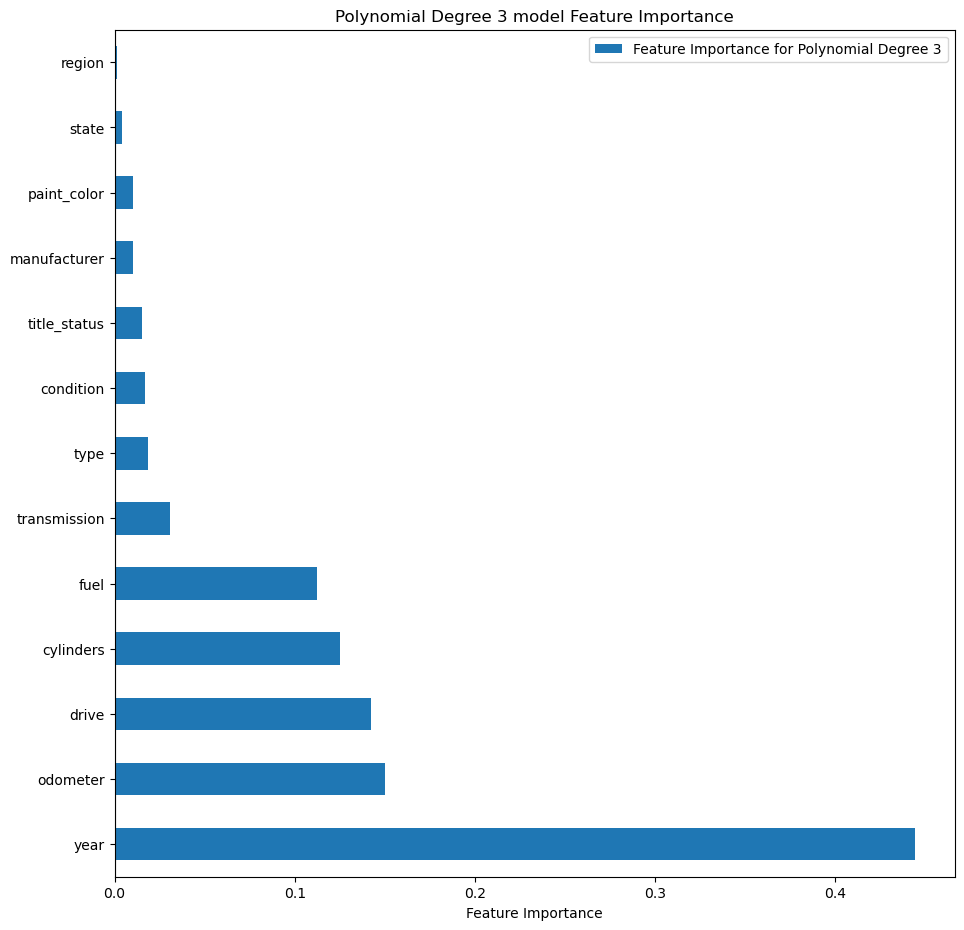

In [63]:
import matplotlib.pyplot as plt
feature_importance_poly3.plot.barh(figsize=(14, 11))
plt.title("Polynomial Degree 3 model Feature Importance")
plt.axvline(x=0, color=".5")
plt.xlabel("Feature Importance")
plt.subplots_adjust(left=0.3)